In [1]:
import pandas as pd
import numpy as np

import itertools
import random
from math import sqrt
import matplotlib.pyplot as plt

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler #Scaling for better performance

In [2]:
df = pd.read_csv('Jacksonville KPI 2023.csv', parse_dates=['Date of Service'], index_col = 'Date of Service')

#Differencing the 'Actual Trips' column due to a p_value greater than 0.05
df['Actual Trips Diff']=df['Actual Trips'].diff()

#Dropping the NaN values resulting from differencing
df.dropna(inplace = True)

df

,Actual Trips,Operating Hours,Turn Down Transports,Actual Trips Diff
Date of Service,,,,
2023-01-03,5,14.16,5,4.0
2023-01-04,4,21.16,2,-1.0
2023-01-05,11,39.12,6,7.0
2023-01-06,9,21.65,4,-2.0
2023-01-07,8,30.07,1,-1.0
...,...,...,...,...
2024-01-18,11,40.00,13,2.0
2024-01-19,7,20.93,12,-4.0
2024-01-20,7,21.22,5,0.0


In [3]:
#Using the Dickery-Fuller test, testing 'Actual Trips Diff' for stationary
result_diff = adfuller(df['Actual Trips Diff'])
print('ADF Statistic: %f' % result_diff[0])
print('p-value %f' % result_diff[1])

ADF Statistic: -7.773244
p-value 0.000000


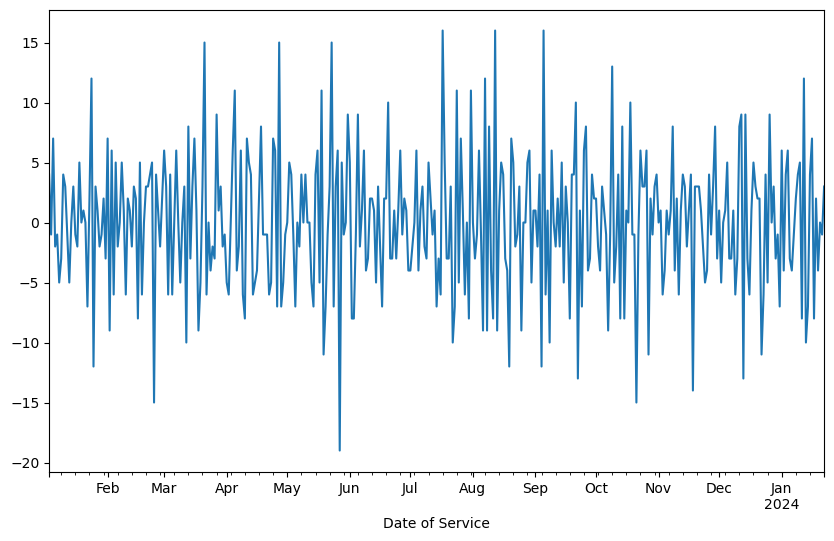

In [4]:
#Visualizing the Differenced Series
df['Actual Trips Diff'].plot(figsize=(10,6))
plt.show()

In [5]:
# #Train-Test Split
# train_end = pd.to_datetime('11/30/2023') #End-Date for training, not for entire dataset
# train = df.loc[:train_end]
# test = df.loc[train_end + pd.Timedelta(days=1):] #The rest of the dates
# #pd.DataFrame(train)
# pd.DataFrame(test)

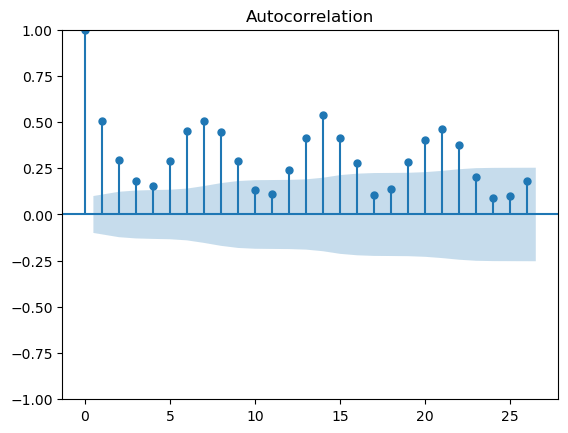

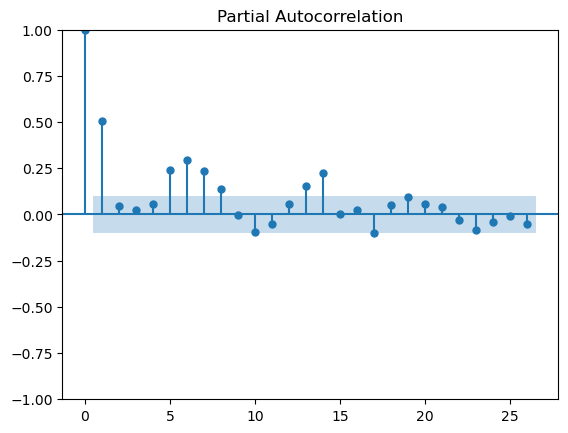

In [6]:
#Using grid search for model selection. (Still needs to be implemented)
plot_acf(df['Actual Trips'].dropna())
plot_pacf(df['Actual Trips'].dropna())
plt.show()

<Axes: xlabel='Date of Service'>

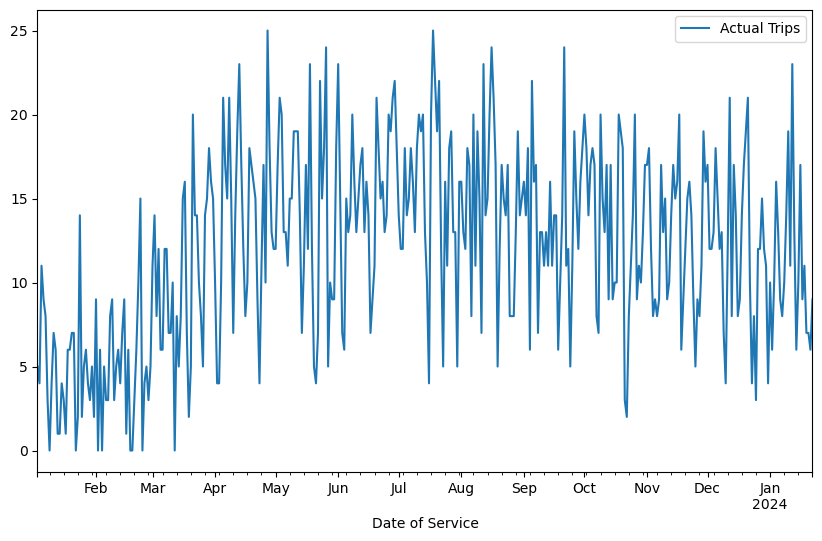

In [7]:
#To determine s, you can look at the plot of your data and see if there is any obvious repeating pattern. 
#If there is, then the number of periods in that pattern is your s value.

#Plotting Data to determine seasonality. 
df['Actual Trips'].plot(figsize=(10,6), legend=True, label='Actual Trips')
#Seasonality seems to be half a month (s=15 given daily data), or a whole month (s=30 given daily data)

In [8]:
#Defining Parameter Space
# p = d = q = range(0,3)
# P = D = Q = range(0, 3)
# s_values = [7, 14, 30]  #Testing for Weekly, Bi-Weely, and Monthly Seasonality

#Narrowing selection based on emperical evidence from testing
p = range(1,2)
d = q = range(0,3)
P = D = Q = range(0,3)
s_values = [3, 4, 7, 14, 30]


# Random Grid Search across all units
parameters = list(itertools.product(p, d, q, P, D, Q, s_values))
pdq_combinations = random.sample(parameters, min(len(parameters), 30))  # Randomly sample combinations to list of 10.
#If not, then there would be a huge list to try out and it just takes too long. That's why the previous 2 lines of code take 
#a long time to finish. Need a stronger PC to run. Meanwhile, Keep running these 2 lines until you get a low AIC. 

In [9]:
#To illistrate the difference in the size of each list. 
pdq_combinations

[(1, 0, 1, 2, 0, 0, 4),
 (1, 2, 2, 0, 2, 2, 30),
 (1, 0, 0, 2, 2, 2, 4),
 (1, 2, 0, 1, 1, 0, 7),
 (1, 1, 1, 0, 2, 1, 3),
 (1, 0, 0, 0, 1, 0, 7),
 (1, 2, 2, 2, 2, 1, 4),
 (1, 1, 2, 2, 2, 1, 30),
 (1, 1, 0, 1, 2, 2, 7),
 (1, 0, 0, 2, 2, 2, 7),
 (1, 2, 2, 1, 0, 1, 30),
 (1, 1, 1, 1, 1, 1, 3),
 (1, 1, 1, 1, 0, 1, 7),
 (1, 0, 2, 1, 0, 0, 14),
 (1, 0, 2, 0, 0, 0, 3),
 (1, 0, 1, 1, 1, 1, 14),
 (1, 2, 1, 0, 2, 0, 30),
 (1, 2, 1, 1, 0, 2, 3),
 (1, 2, 1, 1, 0, 1, 4),
 (1, 2, 0, 0, 0, 2, 7),
 (1, 1, 2, 1, 1, 0, 3),
 (1, 2, 2, 1, 2, 2, 30),
 (1, 1, 1, 0, 1, 0, 7),
 (1, 0, 1, 0, 2, 2, 30),
 (1, 1, 2, 1, 1, 0, 4),
 (1, 1, 0, 1, 0, 0, 3),
 (1, 0, 1, 2, 2, 0, 4),
 (1, 1, 2, 2, 2, 2, 30),
 (1, 2, 2, 2, 2, 1, 7),
 (1, 1, 0, 2, 0, 1, 3)]

In [10]:
#Testing specific parameters. 
pdq_combinations.extend(((1, 0, 0, 2, 0, 2, 30),))
pdq_combinations

[(1, 0, 1, 2, 0, 0, 4),
 (1, 2, 2, 0, 2, 2, 30),
 (1, 0, 0, 2, 2, 2, 4),
 (1, 2, 0, 1, 1, 0, 7),
 (1, 1, 1, 0, 2, 1, 3),
 (1, 0, 0, 0, 1, 0, 7),
 (1, 2, 2, 2, 2, 1, 4),
 (1, 1, 2, 2, 2, 1, 30),
 (1, 1, 0, 1, 2, 2, 7),
 (1, 0, 0, 2, 2, 2, 7),
 (1, 2, 2, 1, 0, 1, 30),
 (1, 1, 1, 1, 1, 1, 3),
 (1, 1, 1, 1, 0, 1, 7),
 (1, 0, 2, 1, 0, 0, 14),
 (1, 0, 2, 0, 0, 0, 3),
 (1, 0, 1, 1, 1, 1, 14),
 (1, 2, 1, 0, 2, 0, 30),
 (1, 2, 1, 1, 0, 2, 3),
 (1, 2, 1, 1, 0, 1, 4),
 (1, 2, 0, 0, 0, 2, 7),
 (1, 1, 2, 1, 1, 0, 3),
 (1, 2, 2, 1, 2, 2, 30),
 (1, 1, 1, 0, 1, 0, 7),
 (1, 0, 1, 0, 2, 2, 30),
 (1, 1, 2, 1, 1, 0, 4),
 (1, 1, 0, 1, 0, 0, 3),
 (1, 0, 1, 2, 2, 0, 4),
 (1, 1, 2, 2, 2, 2, 30),
 (1, 2, 2, 2, 2, 1, 7),
 (1, 1, 0, 2, 0, 1, 3),
 (1, 0, 0, 2, 0, 2, 30)]

In [11]:
#Grid Search Function that returns lowest AIC

#A lot to compute
#def sarimax_grid_search(data, exog_data, pdq_combinations, seasonal_combinations): #Order and seasonal order separated.
    
#Less to compute
def sarimax_grid_search(data, exog_data, pdq_combinations): #Aggregated order and seasonal order. 
#def sarimax_grid_search(data, pdq_combinations): #Testing without exogenous values
    best_aic = float("inf")
    best_configuration = None
    best_model = None

    #Used for training/test split further below. 
    split_date = pd.Timestamp('2023-11-15')
    
    #Training Test Split
    train = data[data.index < split_date]
    test = data[data.index >= split_date]

    train_exog = exog_data[exog_data.index < split_date]
    test_exog = exog_data[exog_data.index >= split_date]
    
    #For lesser computers.
    for pdq in pdq_combinations:
        try:
            model = SARIMAX(train, order=pdq[:3], seasonal_order=pdq[3:], exog = train_exog, 
                            enforce_stationarity=False, enforce_invertibility=False)
            model_fit = model.fit(disp=False)

            if model_fit.aic < best_aic: #Depending on what for loop block, we need to indent.
                best_aic = model_fit.aic
                #best_configuration = (pdq, seasonal_combination)
                best_configuration = pdq
                best_model = model_fit

        except Exception as e: #Depending on what for loop block, we need to indent.
            print(e)
            continue
            
    if best_configuration is None:
        raise ValueError("No suitable model parameters found for aggregate data")
    
    #Predicting the rest of the forecast to compare to test data. Steps has to be the remaining days to predict. 
    predictions = best_model.forecast(steps=len(test), exog = test_exog)
    
    # Performance Metrics
    mse = mean_squared_error(test, predictions)
    mae = mean_absolute_error(test, predictions)
    rmse = np.sqrt(mse)
    print(f'Best SARIMAX: {best_configuration} - MSE: {mse}, MAE: {mae}, RMSE: {rmse}')

    # Plotting Forecast vs Actual
    plt.figure(figsize=(10, 6))
    plt.plot(test, label='Actual')
    plt.plot(predictions, label='Forecast', color='red')
    plt.title(f'SARIMAX Model Forecast vs Actual Trips')
    plt.xlabel('Date')
    plt.ylabel('Actual Trips')
    plt.legend()
    plt.show()
    
    return best_aic, best_configuration, best_model

In [12]:
#Preparing data with proper frequency and scaling
features_to_normalize = ['Actual Trips', 'Operating Hours', 'Turn Down Transports']
scaler = StandardScaler()
df[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])
#df

start_date = df.index.min()
end_date = df.index.max()
date_range = pd.date_range(start= start_date, end= end_date, freq = 'D')
data = df[['Actual Trips', 'Operating Hours', 'Turn Down Transports']].groupby(df.index).mean().reindex(date_range, 
                                                                                                        fill_value = 0)
data

,Actual Trips,Operating Hours,Turn Down Transports
2023-01-03,-1.238527,-1.346679,-0.465303
2023-01-04,-1.414285,-0.887326,-1.073937
2023-01-05,-0.183976,0.291244,-0.262424
2023-01-06,-0.535493,-0.855171,-0.668181
2023-01-07,-0.711251,-0.302635,-1.276816
...,...,...,...
2024-01-18,-0.183976,0.348991,1.157724
2024-01-19,-0.887010,-0.902419,0.954845
2024-01-20,-0.887010,-0.883388,-0.465303
2024-01-21,-1.062768,-1.496953,-1.276816


C:\Users\P3152044\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\P3152044\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\P3152044\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\P3152044\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\P3152044\AppData\Local\

Best SARIMAX: (1, 0, 0, 2, 0, 2, 30) - MSE: 0.2042439410452598, MAE: 0.3791931723671958, RMSE: 0.4519335582198558


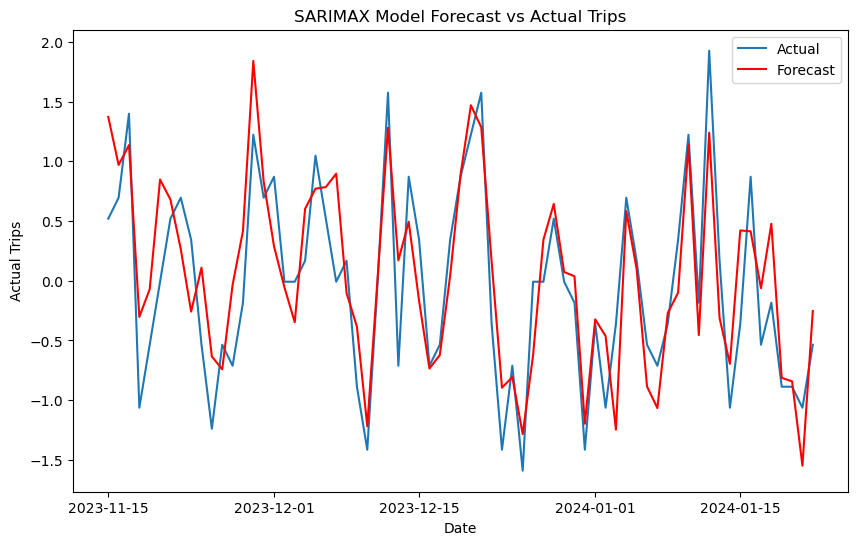

In [13]:
#Running Grid Search
#SARIMAX can internally difference with value (d). We manually difference (d=1) just to check stationarity. 
#Now we will let SARIMAX integrate difference by setting d=1 manually on the ORIGINAL dataset. 

#ts_data = df['Actual Trips'] #No scaling, we are more concerned with stationarity with the target value. 

ts_data = data['Actual Trips'] #Scaling is being performed on actual trips as well for better performance.

#Exogenous Values tend to help the model significantly.
exog = data[['Operating Hours', 'Turn Down Transports']]

#For lesser PC
best_aic, best_configuration, best_model = sarimax_grid_search(ts_data, exog, pdq_combinations)

# print(f"Best SARIMAX parameters: {best_configuration} with AIC: {best_aic}")

In [14]:
#Best SARIMAX: (1, 0, 0, 2, 0, 2, 30) - MSE: 0.19990611255374155, MAE: 0.3737565652078516, RMSE: 0.4471086138219007
best_configuration

(1, 0, 0, 2, 0, 2, 30)

In [15]:
sarimax_model = SARIMAX(ts_data,
               order = best_configuration[:3],
               seasonal_order = best_configuration[3:])
               #exog=exog) #Comment out to test without exogenout values
    
sarimax_model_fit = sarimax_model.fit(disp=False)

In [16]:
#model = best_model
model = sarimax_model_fit
steps = 14
forecast = model.forecast(steps)  # Forecasting for the next 14 day

In [17]:
#To correctly apply the inverse transform, you need to reconstruct an array that matches the original data's shape.
original_data = pd.read_csv('Jacksonville KPI 2023.csv', parse_dates=['Date of Service'], index_col = 'Date of Service')

#Dropping the NaN values resulting from differencing
original_data.dropna(inplace = True)

#Creating dummy array with zeroes that has same shape as original dataset
dummy_array = np.zeros((len(forecast), original_data.shape[1]))

#Replace column for target variable in the dummy array with your predicitons
dummy_array[:, 0] = forecast
dummy_array

array([[-0.21926492,  0.        ,  0.        ],
       [ 0.12973909,  0.        ,  0.        ],
       [-0.0378315 ,  0.        ,  0.        ],
       [ 0.17523358,  0.        ,  0.        ],
       [-0.12081524,  0.        ,  0.        ],
       [-0.21722599,  0.        ,  0.        ],
       [-0.05382028,  0.        ,  0.        ],
       [-0.00393045,  0.        ,  0.        ],
       [ 0.09965643,  0.        ,  0.        ],
       [-0.09640985,  0.        ,  0.        ],
       [-0.02294226,  0.        ,  0.        ],
       [-0.33645986,  0.        ,  0.        ],
       [-0.0347318 ,  0.        ,  0.        ],
       [-0.02681411,  0.        ,  0.        ]])

In [18]:
#Apply inverse transform
inverse_array = scaler.inverse_transform(dummy_array)

#Extracting the target variable predictions from inverse transform array
predicted_actual_trips = inverse_array[:, 0]

predicted_actual_trips

array([10.79921793, 12.78492012, 11.83150616, 13.04376671, 11.35935976,
       10.81081869, 11.740536  , 12.02439044, 12.61376105, 11.4982173 ,
       11.91622039, 10.13242262, 11.8491423 , 11.89419102])

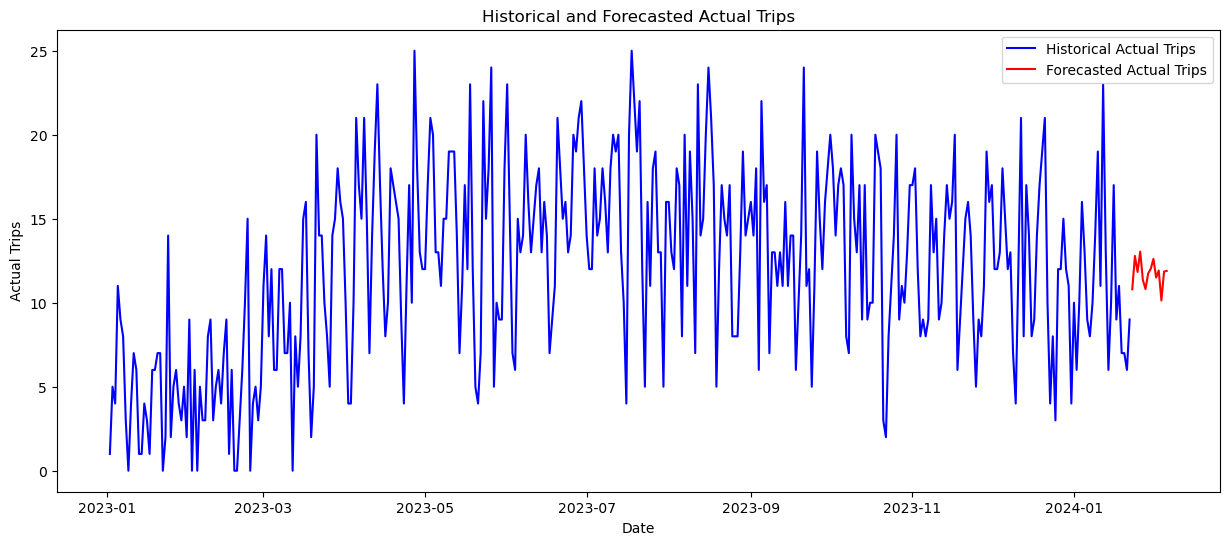

In [19]:
#Visualizing Forecast Alongside Historical Data

#Historical Values
plt.figure(figsize=(15,6))
plt.plot(original_data.index, original_data['Actual Trips'], label='Historical Actual Trips', color = 'blue')

#Forecasted Values
future_dates = pd.date_range(start=original_data.index[-1] + pd.Timedelta(days=1), periods=14, freq = 'D')
plt.plot(future_dates, predicted_actual_trips, label = 'Forecasted Actual Trips', color = 'red')

#Setting Title and Labels
plt.legend()
plt.xlabel('Date')
plt.ylabel('Actual Trips')
plt.title('Historical and Forecasted Actual Trips')

#Save Figure
plt.savefig('Actual Trips Forecasted Trajectory.pdf', bbox_inches='tight')

plt.show()

In [20]:
#Storing predictions in a DataFrame
forecast_df = pd.DataFrame({'Date of Service': future_dates.strftime('%A: %m-%d-%Y'),
                            'Predicted Actual Trips': predicted_actual_trips})
forecast_df = forecast_df.round(0)
forecast_df

,Date of Service,Predicted Actual Trips
0,Tuesday: 01-23-2024,11.0
1,Wednesday: 01-24-2024,13.0
2,Thursday: 01-25-2024,12.0
3,Friday: 01-26-2024,13.0
4,Saturday: 01-27-2024,11.0
5,Sunday: 01-28-2024,11.0
6,Monday: 01-29-2024,12.0
7,Tuesday: 01-30-2024,12.0
8,Wednesday: 01-31-2024,13.0
9,Thursday: 02-01-2024,11.0


In [21]:
#Saving DataFrame to a csv file
forecast_df.to_csv('1. Actual Trips Predictions - Jacksonville.csv', mode = 'w', index = False, header = True)